# Day 13: Image Classification with PyTorch – Dataset, Display, and Augmentation

This document summarizes the foundational concepts and implementation steps for building an image classification pipeline using PyTorch. The focus is on handling image data, loading structured datasets, visualizing samples, and applying data augmentation to improve model robustness.

---

## 1. Introduction to Image Data

Digital images are composed of **pixels** (picture elements), which are the smallest units of visual information.

- **Grayscale images**: Each pixel is a single integer between 0 (black) and 255 (white).
- **Color images**: Each pixel is represented by three integers for **Red**, **Green**, and **Blue** channels (RGB). For example:
  - Pixel `[52, 171, 235]` represents a specific shade of blue.

Understanding pixel structure is essential for preprocessing and model input formatting.

---

## 2. Cloud Type Classification Dataset

The project uses the **Cloud Type Classification** dataset from Kaggle:
[Cloud Type Classification Dataset](https://www.kaggle.com/competitions/cloud-type-classification2/data)

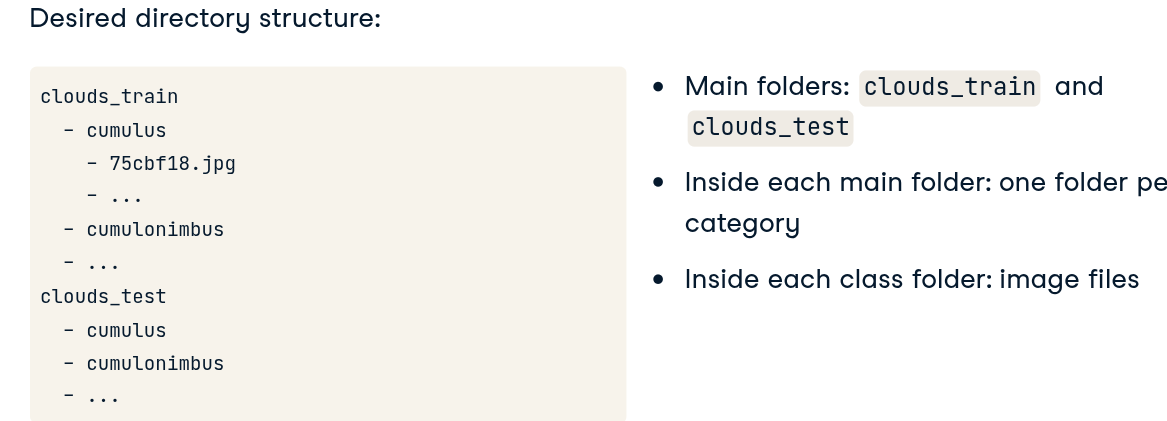

- **Directory structure**:
  - `cloud_train/` and `cloud_test/` folders
  - Each contains **seven subfolders**, one for each cloud type
  - Each subfolder contains `.jpg` images representing that class

This structure is compatible with PyTorch’s `ImageFolder` utility.

---

## 3. Loading Images with PyTorch

To load and preprocess images:

- Use `ImageFolder` from `torchvision.datasets` to create a labeled dataset.
- Apply transformations using `transforms.Compose`:
  - `ToTensor()`: Converts image to a PyTorch tensor
  - `Resize((128, 128))`: Standardizes image dimensions

This ensures consistent input size and format for the model.

---

## 4. Displaying Image Samples

Once loaded, images have the shape:  
`[batch_size, channels, height, width]` → `[1, 3, 128, 128]`

To visualize an image using `matplotlib`:

- Use `squeeze()` to remove the batch dimension
- Use `permute(1, 2, 0)` to rearrange dimensions to `[height, width, channels]`
- Call `plt.imshow()` followed by `plt.show()`

This step is crucial for verifying data integrity and understanding input structure.

---

## 5. Data Augmentation Techniques

Data augmentation increases dataset diversity and helps prevent overfitting.

Common transformations include:

- `RandomHorizontalFlip()`: Flips images horizontally
- `RandomRotation(degrees=(0, 45))`: Rotates images randomly within a specified range

Benefits of augmentation:

- Simulates real-world distortions
- Improves model generalization
- Reduces reliance on specific pixel patterns

Augmentation is applied during dataset loading and is only used for training data.

---

## 6. Summary of Key Concepts

| Concept               | Description                                           |
|-----------------------|-------------------------------------------------------|
| Pixels                | Fundamental units of image data                      |
| RGB Channels          | Represent color intensity per pixel                  |
| ImageFolder           | Loads structured image datasets with labels          |
| ToTensor + Resize     | Converts and standardizes image input                |
| Squeeze + Permute     | Prepares image for visualization                     |
| Data Augmentation     | Adds variability to training data                    |

---

## 7. Final Notes

Today’s session laid the groundwork for building image classifiers in PyTorch. By mastering image loading, preprocessing, and augmentation, you’re now equipped to train models that handle real-world visual data with robustness and precision.



# day 14
Data augmentation in PyTorch

* Using data augmentation allows the model to learn from more examples 
* Using data augmentation increases the diversity of the training data
* Data augmentation makes the model more robust to variations and distortions commonly found in real-world images 

Data augmentation reduces the risk of overfitting as the model learns to ignore the random transformations press

iam including data augmentation in your Dataset and inspect some images visually to make sure the desired transformations are applied.

First, i add the augmenting transformations to train_transforms. Let's use a random horizontal flip and a rotation by a random angle between 0 and 45 degrees. The code that follows to create the Dataset and the DataLoader is exactly the same as before. Finally, you'll reshape the image and display it to see if the new augmenting transformations are visible.

In [1]:
from torchvision.datasets import ImageFolder
from torchvision import transforms# Compose transformations
from torchvision import datasets, transforms


In [9]:
# Compose transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128,128)),
])

# Create Dataset using ImageFolder
dataset_train = datasets.ImageFolder(
    'clouds/clouds/clouds_train',
    transform=train_transforms,
)

In [10]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt

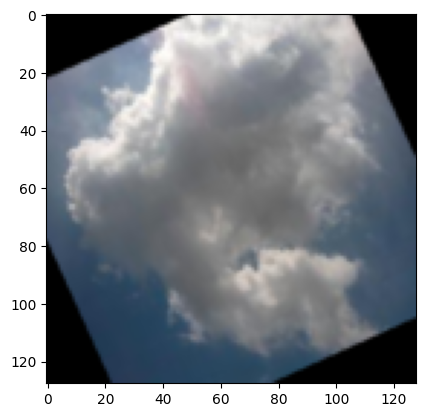

In [11]:
train_transforms = transforms.Compose([
    # Add horizontal flip and rotation
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
  "clouds/clouds/clouds_train",
  transform=train_transforms,
)

dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=1
)

image, label = next(iter(dataloader_train))
# Reshape the image tensor

# The numbers inside the parentheses represent the new order. In this case, (1, 2, 0) means:

# The original second dimension becomes the first.
# The original third dimension becomes the second.
# The original first dimension becomes the third.
# This operation is often used to change the channel order from (C, H, W) (Channels, Height, Width) to (H, W, C). This is a common format for displaying images because it aligns with how we typically think about images (height, width, and then the color channels).
image = image.squeeze().permute(1, 2, 0) 
# Display the image
plt.imshow(image)
plt.show()



## 1. Why Not Use Linear Layers for Images?

- A grayscale image of size 256×256 has **65,536 inputs**.
- Connecting it to just 1,000 neurons results in **65 million parameters**.
- A color image triples the input size, leading to **200+ million parameters** in the first layer alone.
- Linear layers do **not preserve spatial structure** — they fail to recognize patterns that shift position (e.g., a cat in different corners).
- CNNs solve this by using **local filters** that detect spatial features regardless of position.
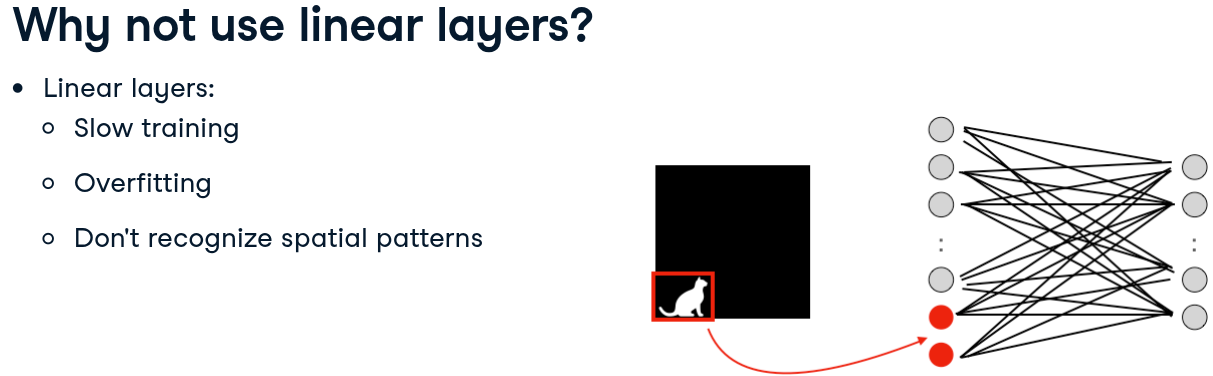

---

## 2. Convolutional Layers

- A **convolutional layer** uses small grids called **filters** (e.g., 3×3) that slide over the input image.
- Each filter performs a **dot product** with the input patch to produce a **feature map**.
- 
- 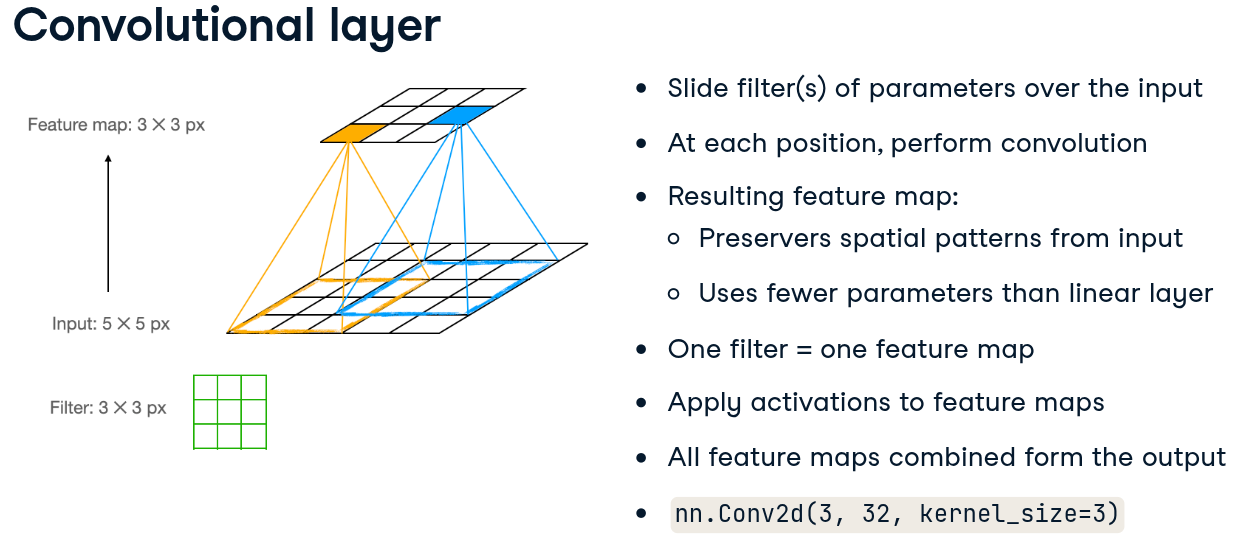
- 
- Multiple filters produce multiple feature maps, capturing different patterns.
- Feature maps preserve spatial relationships and require far fewer parameters than fully connected layers.
- In PyTorch, use `nn.Conv2d(in_channels, out_channels, kernel_size)`.

---

## 3. Convolution Operation

- A convolution is a **dot product** between the filter and the input patch.
- Each output value is the **sum of element-wise multiplications**.
- 
- 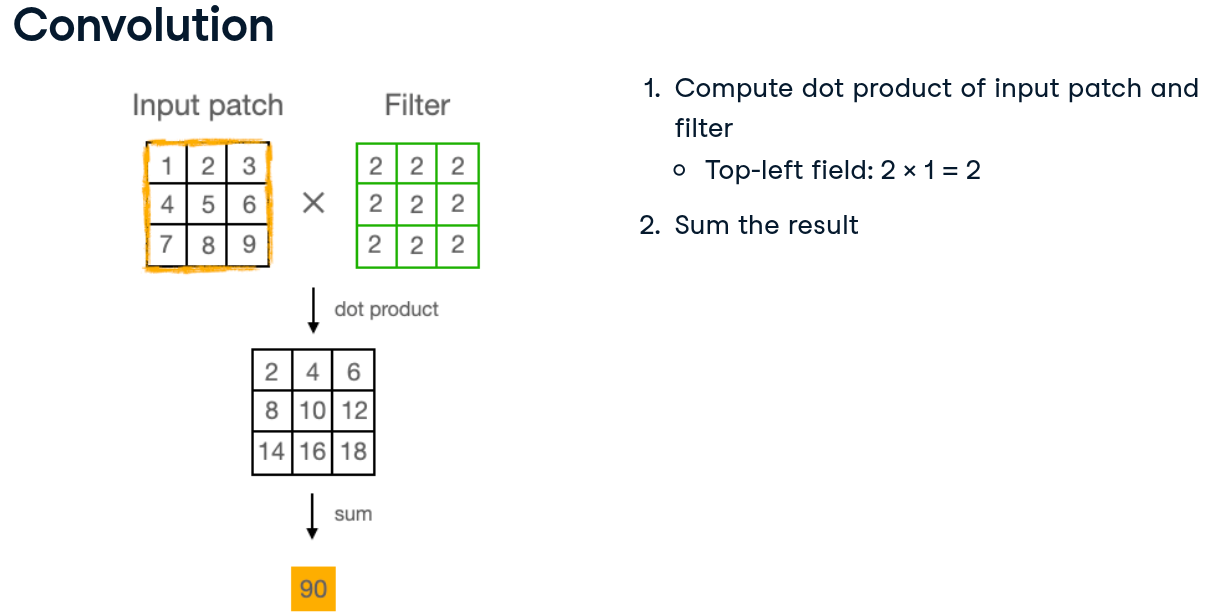
- 
- This operation is repeated across the image to build the full feature map.

---

## 4. Zero-Padding

- **Zero-padding** adds a border of zeros around the input image.
- 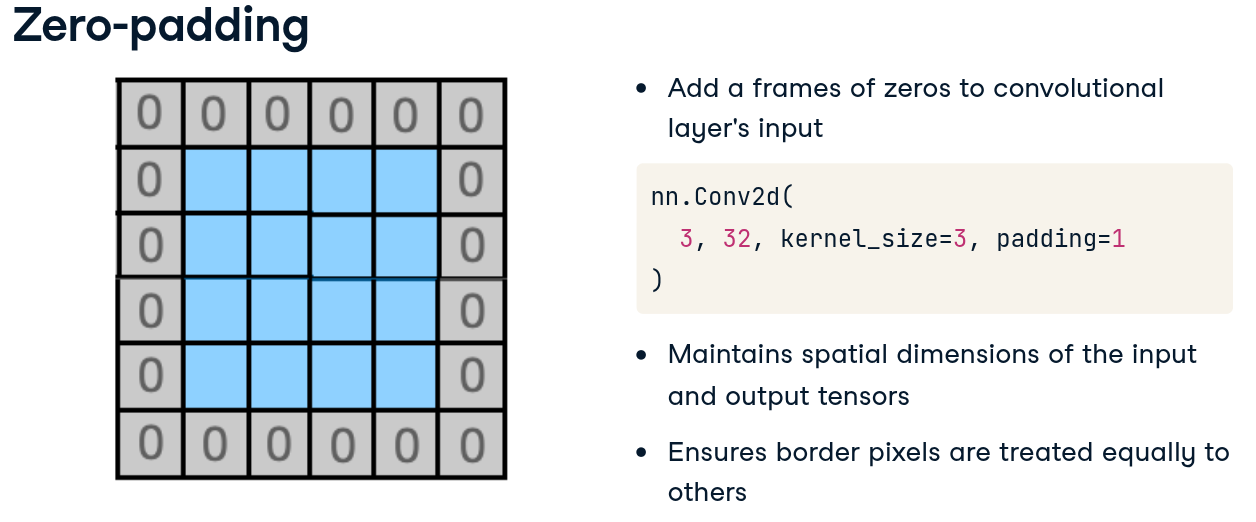
- It ensures:
  - Output dimensions match input dimensions
  - Border pixels are treated equally
  - No loss of spatial information
- In PyTorch, use the `padding` argument in `Conv2d`.

---

## 5. Max Pooling

- **Max pooling** reduces spatial dimensions by selecting the maximum value in a window (e.g., 2×2).
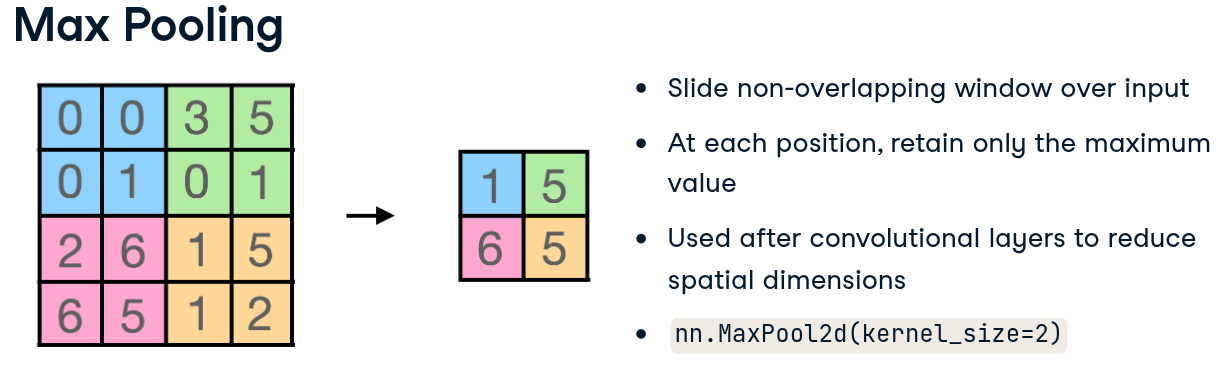
- 
- This:
  - Reduces computation
  - Introduces translation invariance
  - Helps prevent overfitting
- In PyTorch, use `nn.MaxPool2d(kernel_size)`.

---

## 6. CNN Architecture Overview

A typical CNN has two components:

### A. Feature Extractor
- Two convolutional blocks:
  - `Conv2d → Activation → MaxPool2d`
- First block:
  - Input: 3 channels (RGB)
  - Output: 32 feature maps
  - Kernel size: 3×3
  - Padding: 1
  - Pooling: 2×2
- Second block:
  - Output: 64 feature maps
  - Pooling: 2×2
  - 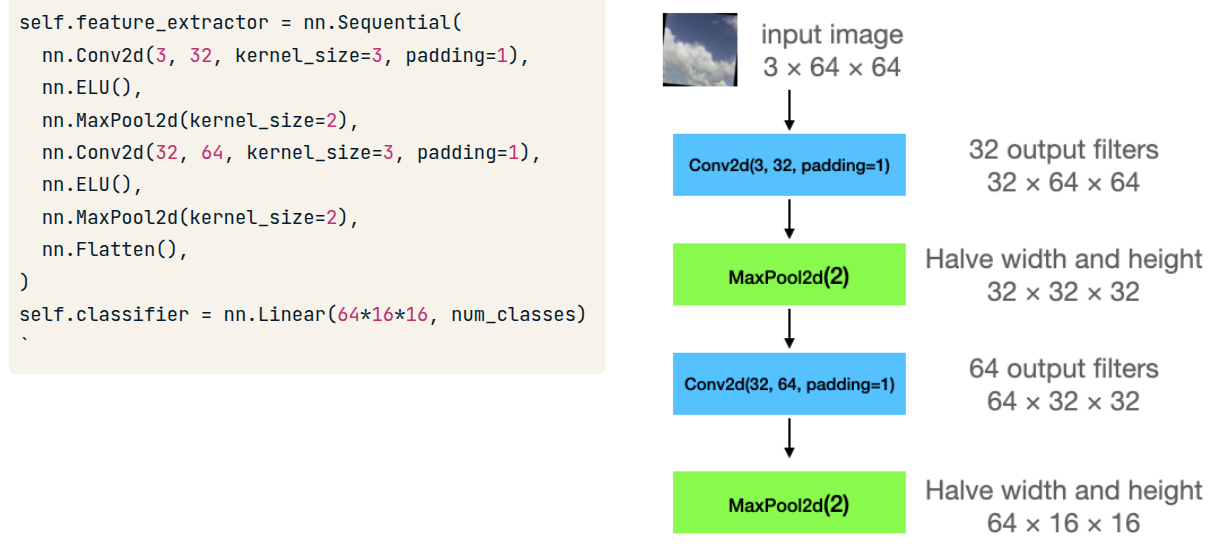

### B. Classifier
- Flatten the output of the feature extractor
- Use a `Linear` layer to map to the number of target classes

---

Conv2d:

Summary: Learns to detect features by applying filters.
Example: Detects 32 different edge features (e.g., vertical, horizontal) in the input image, measuring the magnitude (strength) of each edge.


MaxPool2d:

Summary: Reduces spatial dimensions, focuses on most important features.
Example: From a 2x2 region, selects the pixel with the highest edge magnitude, effectively summarizing the presence of edges in that region.


Final Flattened Output:

Summary: Converts the feature maps into a single vector for the classifier.
Example: After flattening, the model has a vector of 16,384 numbers, each representing a combination of features, like "strong vertical edge in the top-left" or "weak texture in the center," ready for classification.


## 7. Feature Extractor Output Size Calculation

Given input image size: `3×64×64`

- After first `Conv2d`: `32×64×64` (padding preserves dimensions)
- After first `MaxPool2d`: `32×32×32` (halves height and width)
- After second `Conv2d`: `64×32×32`
- After second `MaxPool2d`: `64×16×16`

Final flattened size: `64 × 16 × 16 = 16,384` → input to the classifier

---

## 8. Summary of Key Concepts

| Component           | Purpose                                      |
|---------------------|----------------------------------------------|
| Conv2d              | Extract spatial features with shared weights |
| Zero-padding        | Preserve spatial dimensions and border info  |
| MaxPool2d           | Downsample feature maps                      |
| Feature maps        | Capture localized patterns                   |
| Classifier          | Map extracted features to output classes     |

---

## 9. Final Notes

Convolutional Neural Networks are the backbone of modern computer vision. Today’s implementation clarified how CNNs reduce parameter count, preserve spatial hierarchies, and scale efficiently. Understanding the flow from raw image to class prediction is essential for building robust image models.



Ya weather forecasting system. As part of the system, cameras will be installed at various locations to take pictures of the sky. Your task is to build a model to classify different cloud types in these pictures, which will help spot approaching weather fronts.

decide to build a convolutional image classifier. The model will consist of two parts:

A feature extractor that learns a vector of features from the input image,
A classifier that predicts the image's class based on the learned features.

In [50]:
import torch
import torch.nn as nn
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Define feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        num_classes=7
        self.classifier = nn.Linear(64*16*16, num_classes)
        
    def forward(self, x):  
        # Pass input through feature extractor and classifier
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x
        


## 1. Data Augmentation: Purpose and Pitfalls

Data augmentation artificially expands the training dataset by applying random transformations to input images. This improves generalization and reduces overfitting.

### Valid Augmentation Example
- Original label: **cat**
- Augmentations: `RandomRotation`, `RandomHorizontalFlip`
- Outcome: Augmented image still clearly depicts a cat
- Benefit: Model learns to recognize cats from varied angles and perspectives

### Invalid Augmentation Examples
- **Fruit classification**:
  - Augmentation: `ColorShift` on a lemon
  - Outcome: Image resembles a lime, but label remains "lemon"
  - Risk: Misleading label introduces noise

- **Handwritten character classification**:
  - Augmentation: `VerticalFlip` on "W"
  - Outcome: Image resembles "M"
  - Risk: Confuses model and impairs learning

### Key Insight
Augmentations must be **task-aware**. Not all transformations are safe for all domains. Always consider how an augmentation affects label integrity.

---

## 2. Augmentations for Cloud Classification

For the cloud classification task, the following augmentations are appropriate:

| Augmentation         | Purpose                                                  |
|----------------------|----------------------------------------------------------|
| `RandomRotation`     | Simulates varied angles of cloud formations              |
| `RandomHorizontalFlip` | Mimics different viewpoints of the sky                 |
| `RandomAutocontrast` | Adjusts lighting conditions to improve robustness        |

These augmentations enhance the model’s ability to generalize across real-world variations in cloud imagery.

---

## 3. Loss Function: Cross-Entropy for Multi-Class Tasks

- The cloud dataset contains **seven cloud types** → a **multi-class classification** problem.
- Use `nn.CrossEntropyLoss()` in PyTorch.
- This differs from binary classification tasks (e.g., water potability), which use `nn.BCELoss()`.

### Why Cross-Entropy?
- Measures the difference between predicted class probabilities and true class labels
- Suitable for tasks with **more than two classes**
- Automatically applies `LogSoftmax` internally

---

## 4. Image Classifier Training Loop

The training loop structure remains consistent with previous implementations:

1. **Model Initialization**
   - Instantiate the CNN with `num_classes = 7`

2. **Loss and Optimizer Setup**
   - Loss: `nn.CrossEntropyLoss()`
   - Optimizer: `torch.optim.Adam(model.parameters(), lr=0.001)`

3. **Epoch Iteration**
   - Loop over training epochs
   - For each batch:
     - Move data to device
     - Forward pass
     - Compute loss
     - Backward pass
     - Optimizer step

This loop trains the model to minimize classification error across all seven cloud categories.

---

## 5. Summary of Key Concepts

| Component              | Description                                             |
|------------------------|---------------------------------------------------------|
| Data Augmentation      | Expands dataset, improves generalization                |
| Task-Aware Augmentation| Avoid transformations that distort label semantics      |
| CrossEntropyLoss       | Suitable for multi-class classification                 |
| Training Loop          | Standard PyTorch loop with optimizer and loss updates   |

---

## 6. Notes

Today’s session emphasized the importance of **domain-specific augmentation** and **loss function alignment**. By tailoring preprocessing and training logic to the task, we ensure that the model learns meaningful patterns and avoids label confusion. This forms the backbone of robust image classification pipelines.



You have already built the image dataset from cloud pictures and the convolutional model to classify different cloud types. Before you train it, let's adapt the dataset by adding the augmentations that could improve the model's cloud classification performance.

The code to set up the Dataset and DataLoader is already prepared for you and should look familiar. Your task is to define the composition of transforms that will be applied to the input images as they are loaded.

Note that before you were resizing images to 128 by 128 to display them nicely, but now you will use smaller ones to speed up training. As you will see later, 64 by 64 will be large enough for the model to learn.

In [51]:
from torchvision import transforms
# Define transforms
train_transforms = transforms.Compose([
  transforms.RandomHorizontalFlip(),
  transforms.RandomRotation(45),
  transforms.RandomAutocontrast(),
  transforms.ToTensor(),
  transforms.Resize((64, 64))
])

dataset_train = ImageFolder(
  "clouds/clouds/clouds_train",
  transform=train_transforms,
)
dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=16
)

it's time to train the image classifier! You will use the Net you defined earlier and train it to distinguish between seven cloud types.

To define the loss and optimizer, you will need to use functions from torch.nn and torch.optim, imported for you as nn and optim, respectively. You don't need to change anything in the training loop itself: it's exactly like the ones you wrote before, with some additional logic to print the loss during training.

In [ ]:
import torch.optim as optim

# Define the model
net = Net(num_classes=7)
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(37):
    running_loss = 0.0
    # Iterate over training batches
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1, Loss: 1.9276
Epoch 2, Loss: 1.5783
Epoch 3, Loss: 1.4368
Epoch 4, Loss: 1.3338



## 1. Test-Time Data Preparation

During evaluation, we must avoid data augmentation. The goal is to assess the model's performance on **unaltered test images**, not on randomly transformed versions.

###  Test-Time Transforms
- `ToTensor()`: Converts image to PyTorch tensor
- `Resize((128, 128))`: Standardizes image dimensions

These transforms ensure consistent input formatting without introducing label noise.

---

## 2. Evaluation Metrics: Beyond Accuracy

While accuracy measures the overall proportion of correct predictions, it can be misleading in imbalanced datasets. Precision and recall offer deeper insights.

### Binary Classification
- **Precision**: Fraction of predicted positives that are correct
- **Recall**: Fraction of actual positives that were correctly predicted

### Multi-Class Classification
- Precision and recall are computed **per class**:
  - Precision for class *C*: Correct predictions of *C* / All predictions of *C*
  - Recall for class *C*: Correct predictions of *C* / All true instances of *C*

---

## 3. Averaging Strategies for Multi-Class Metrics

With 7 cloud classes, we compute 7 precision and 7 recall scores. These can be aggregated using:

| Averaging Type | Description |
|----------------|-------------|
| **Micro**      | Global average across all classes using total TP, FP, FN |
| **Macro**      | Unweighted mean of per-class scores (treats all classes equally) |
| **Weighted**   | Mean of per-class scores weighted by class size |

### When to Use Each
- **Micro**: Best for imbalanced datasets where overall performance matters
- **Macro**: Highlights performance on smaller classes
- **Weighted**: Balances class size and error impact

In PyTorch, set `average='micro'`, `'macro'`, `'weighted'`, or `'none'` when defining metrics.

---

## 4. Evaluation Loop Structure

Steps to evaluate the model:

1. **Import and define metrics** (e.g., `Precision`, `Recall`)
2. **Set averaging strategy** (e.g., macro)
3. **Disable gradient tracking** (`torch.no_grad()`)
4. **Iterate over test batches**
   - Forward pass
   - Get predicted class (`argmax`)
   - Update metrics with predictions and labels
5. **Compute and print final scores**

### Example Insight
- A **higher recall than precision** indicates the model is better at identifying true positives than avoiding false positives.

---

## 5. Per-Class Performance Analysis

To analyze recall per class:

1. Define metric with `average='none'`
2. Run evaluation loop to collect per-class recall scores
3. Use `Dataset.class_to_idx` to map class names to indices
4. Use dictionary comprehension to pair class names with recall values

### Example Interpretation
- **Recall = 1.0** for "clear sky" → perfect classification
- **Lowest recall** for "high cumuliform clouds" → model struggles with this class

---

## 6. Summary of Key Concepts

| Component              | Description                                             |
|------------------------|---------------------------------------------------------|
| Test-Time Transforms   | No augmentation; only tensor conversion and resizing    |
| Precision & Recall     | Class-specific performance metrics                      |
| Averaging Strategies   | Micro, macro, weighted — chosen based on dataset balance|
| Evaluation Loop        | Standard PyTorch loop with metrics tracking             |
| Per-Class Analysis     | Reveals strengths and weaknesses across categories      |

---

## 7. Final Notes

Evaluating image classifiers requires more than just accuracy. By using precision, recall, and per-class analysis, we gain a deeper understanding of model behavior and class-specific performance. This enables targeted improvements and more reliable deployment in real-world settings.



Let's evaluate our cloud classifier with precision and recall to see how well it can classify the seven cloud types. In this multi-class classification task it is important how you average the scores over classes. Recall that there are four approaches:

Not averaging, and analyzing the results per class;
Micro-averaging, ignoring the classes and computing the metrics globally;
Macro-averaging, computing metrics per class and averaging them;
Weighted-averaging, just like macro but with the average weighted by class size.

In [60]:
from torchmetrics import Precision, Recall

dataset_test = ImageFolder(
  "clouds/clouds/clouds_test",
  transform=train_transforms,
)
dataloader_test = DataLoader(
  dataset_train, shuffle=True, batch_size=16
)

# Define metrics
metric_precision = Precision(task='multiclass', num_classes=7, average="micro")
metric_recall = Recall(task='multiclass', num_classes=7,average="micro")

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.7489451766014099
Recall: 0.7489451766014099


In [61]:

# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average='macro')
metric_recall = Recall(task="multiclass", num_classes=7, average='macro')

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.7568398714065552
Recall: 0.7923838496208191


While aggregated metrics are useful indicators of the model's performance, it is often informative to look at the metrics per class. This could reveal classes for which the model underperforms.

In this exercise, you will run the evaluation loop again to get our cloud classifier's precision, but this time per-class. Then, you will map these score to the class names to interpret them.

In [64]:
from torchmetrics.classification import Precision

# Define precision metric for per-class precision
metric_precision = Precision(task="multiclass", num_classes=7, average=None)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision.update(preds, labels)

# Compute per-class precision
precision = metric_precision.compute()

# Map class names to precision values
precision_per_class = {
    k: precision[v].item()
    for k, v in dataset_test.class_to_idx.items()
}

print(precision_per_class)


{'cirriform clouds': 0.6153846383094788, 'clear sky': 0.9137930870056152, 'cumulonimbus clouds': 0.6842105388641357, 'cumulus clouds': 0.7115384340286255, 'high cumuliform clouds': 0.8018018007278442, 'stratiform clouds': 0.8301886916160583, 'stratocumulus clouds': 0.8039215803146362}
